In [88]:
from matplotlib import pyplot as plt 
from pathlib import Path
import os
import matplotlib.image as mpimg
import cv2
import numpy as np
import sys
# from google.colab.patches import cv2_imshow

In [89]:
def images_list(good_image_path, bad_image_path):
    paths_good = sorted(os.listdir(good_image_path))
    paths_bad = sorted(os.listdir(bad_image_path))
    good_images = []
    bad_images = []
    print(paths_good)
    print(paths_bad)
    for imagename in paths_good:
        if str(imagename).find('png') == -1 and str(imagename).find('jpeg') == -1 and str(imagename).find('bmp') == -1:
            continue
        else:
            good_images.append(cv2.imread(os.path.join(good_image_path,imagename)))

    for imagename in paths_bad:
        if str(imagename).find('png') == -1 and str(imagename).find('jpeg') == -1 and str(imagename).find('bmp') == -1:
            continue
        else:
            bad_images.append(cv2.imread(os.path.join(bad_image_path,imagename)))
 
    # returns both image dictionary
    return good_images, bad_images

In [90]:
good_image_path = 'C:/Users/Sayan Hazra/Desktop/Bearings/Cylindrical Bearings/Good' 
bad_image_path = 'C:/Users/Sayan Hazra/Desktop/Bearings/Cylindrical Bearings/Bad' 
print(good_image_path, bad_image_path)
good_images, bad_images = images_list(good_image_path, bad_image_path)

C:/Users/Sayan Hazra/Desktop/Bearings/Cylindrical Bearings/Good C:/Users/Sayan Hazra/Desktop/Bearings/Cylindrical Bearings/Bad
['1.png', '2.png', '3.png']
['1.png', '2.png', '3.bmp']


In [80]:
#### Image Visualization

In [91]:
# image visualization
def image_visualization(fig_title, image_list, row, column, image_count):
  row = row
  col = column
  fig = plt.figure(figsize = (30,8))
  fig.suptitle(fig_title, fontsize = 24)
  for i,image in enumerate(image_list):
    #print(image_dir[imagename].shape)
    fig.add_subplot(row, col, i+1)
    plt.imshow(image, cmap = 'binary')
    plt.axis('off')
  plt.show()


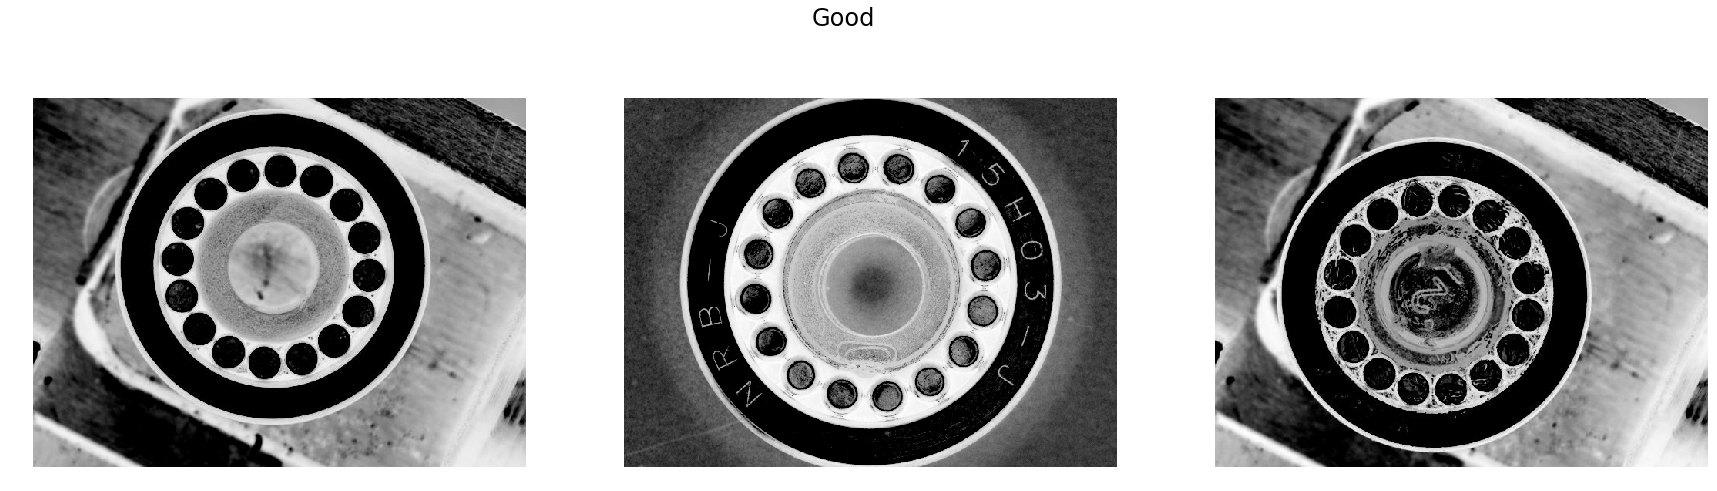

In [78]:
# good image visualization
fig_title = 'Good'
image_list = good_images
row = 1
column = 3
image_count = 3
image_visualization(fig_title, image_list, row, column, image_count)

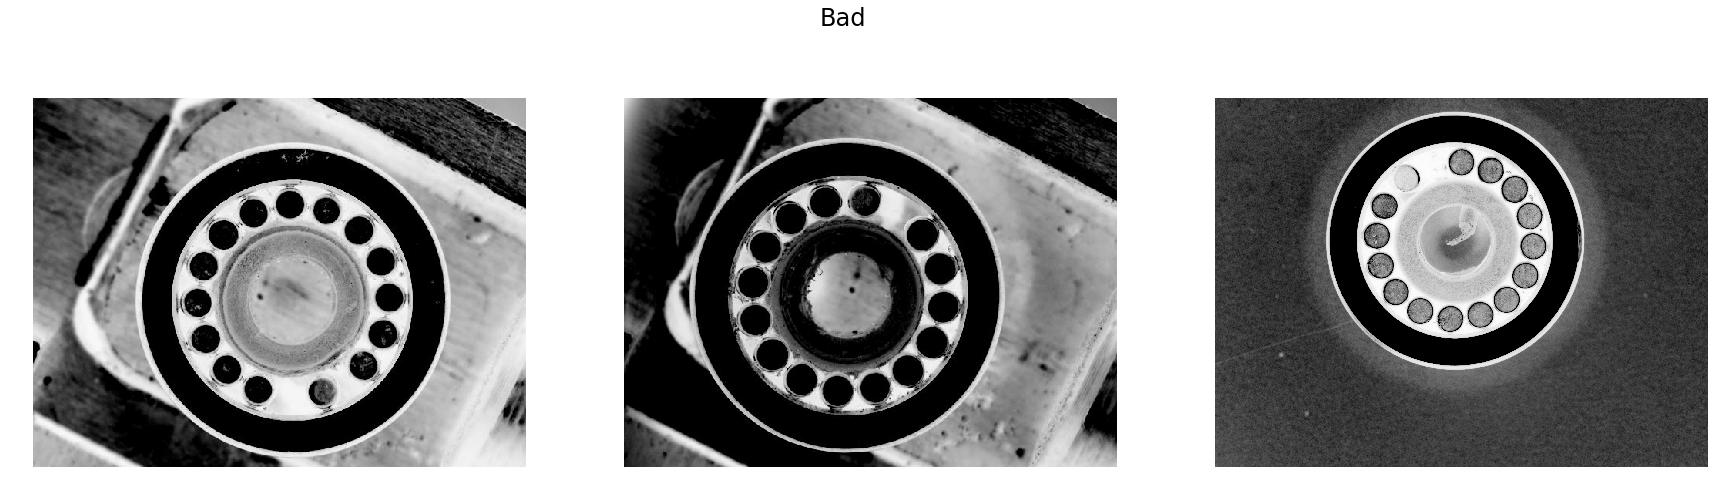

In [79]:
# bad image visualization
fig_title = 'Bad'
image_dict = bad_images
row = 1
column = 3
image_count = 3
image_visualization(fig_title, image_dict, row, column, image_count)

In [100]:
#### Circle detection using hugh circles

In [103]:
img = bad_images[2]
#img = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#img = img.astype('uint8')
print(img.shape)

(1944, 2592)


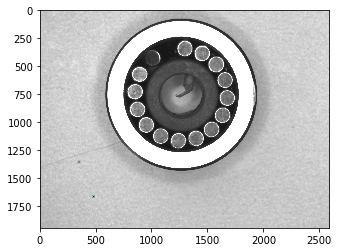

In [106]:

img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=5,maxRadius=25)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cimg)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [107]:
#### Note: Hough Circle detection is not working good